<a href="https://colab.research.google.com/github/leticiagcsilva/Statistics-for-Data-Scietists/blob/main/Previs%C3%A3o_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket Sales Predict

In [1]:
# Importando as bibliotecas:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sales = pd.read_csv('sample_data/supermarket_sales - Sheet1.csv')

Conjunto de dados disponível em: https://www.kaggle.com/aungpyaeap/supermarket-sales


### Exploração dos Dados

In [5]:
sales.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [6]:
# Verificando o tamanho do nosso conjunto de dados (Linhas x Colunas):
sales.shape

(1000, 17)

In [7]:
# Identificando quais são as colunas de nosso conjunto de dados:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**DICIONÁRIO DE DADOS**

- **Invoice ID**: Número de identificação da fatura do recibo de venda gerado por computador;
- **Branch**: Filial do supercentro (estão disponíveis 3 filiais identificadas por A, B e C);
- **City**: Localização dos supercentros; 
- **Customer type**: Tipo de cliente, registado pelos Membros para clientes com cartão de sócio e Normal para sem cartão de sócio;
- **Gender**: Tipo de gênero do cliente;
- **Product Line**: Grupos de categorização geral de itens - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens;
- **Unit price**: Preço de cada produto em $;
- **Quantity**: Número de produtos adquiridos por cliente; 
- **Tax**: taxa de imposto de 5% para compra do cliente;
- **Total**: preço total incluindo imposto;
- **Date**: Data da compra (Registro disponível de janeiro de 2019 a março de 2019);
- **Time**: Horário da compra (10h às 21h)
- **Payment**: Pagamento usado pelo cliente para a compra (3 métodos disponíveis - Dinheiro, Cartão de crédito e Ewallet);
- **COGS**: Custo das mercadorias vendido;
- **Gross margin percentage**: Porcentagem da margem bruta;
- **Gross income**: Renda bruta;
- **Rating**: Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10)


---
Observando o dicionário fornecido e comparando com as colunas que encontramos vemos que eles são correspondentes.


In [9]:
# Checando se o conjunto possui dados faltantes:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

O cunjunto aarentemente não possui nenhum valor nulo. Isso 

In [10]:
# Entendendo o tipo de dado de cada variável do conjunto:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Observamos já na em nossa exploração superficial que temos as variáveis temporais **Date** e **Time** com formato *object*. Isso se torna um impencílio para aplicarmos análises temporais. Vamos convertê-las.

In [11]:
# Transformando a Data objeto em datetime:
  #Para evitar a perda ou reescrever os dados antigos vamos criar 
  #uma nova coluna para colocar a data com deu tipo convertido.

sales['date'] = pd.to_datetime(sales['Date'])
sales['date'].dtype

dtype('<M8[ns]')

In [12]:
# Transformando o Time objeto em datetime:
  #Para evitar a perda ou reescrever os dados antigos vamos criar 
  #uma nova coluna para colocar o tempo com deu tipo convertido.

sales['time'] = pd.to_datetime( sales['Time'])
sales['time'].dtype

dtype('<M8[ns]')

In [13]:
sales.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,2021-06-30 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,2021-06-30 10:29:00


### Feature Engeneering

In [14]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [15]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,time,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,2021-06-30 13:08:00,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,2021-06-30 10:29:00,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,2021-06-30 13:23:00,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,2021-06-30 20:33:00,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,2021-06-30 10:37:00,8,2,2019


In [16]:
sales['Hour'] = (sales['time']).dt.hour 

#### Dummies

Uma *Dummie* nos permite utilizar variáveis categóricas dentro de modelos de *machine learning*. Como o objetivo final desse pipeline é gerar um preditor de vendas, vamos transformar nossas variáveis categóricas em dummies.

In [ ]:
# Gênero
gender_dummies  = pd.get_dummies(sales['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


### Visualização de Dados

Vamos fazer algumas explorações no nosso conjunto a fim de obter alguns insights

#### Gênero

In [ ]:
sales['Gender'].unique()

array(['Female', 'Male'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


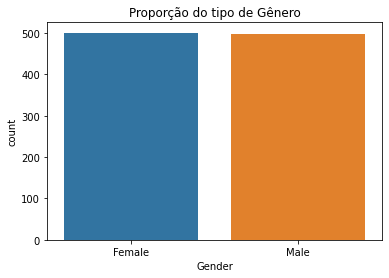

In [ ]:
plt.figure()
plt.title("Proporção do tipo de Gênero")
sns.countplot(sales['Gender'])

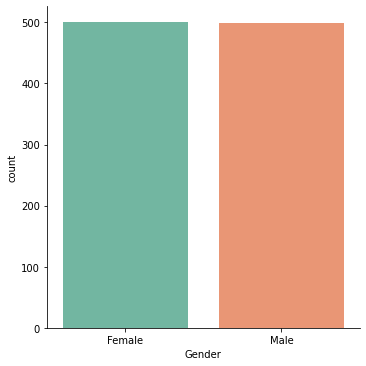

In [ ]:
sns.catplot(x="Gender", kind="count", palette="Set2", data=sales);

Text(0.5, 1.0, 'Valor gasto por Gênero')

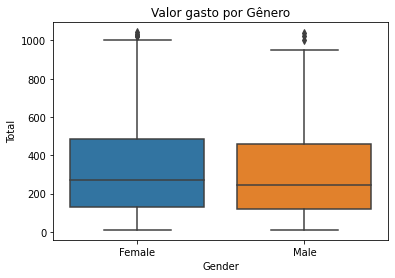

In [ ]:
 sns.boxplot(x="Gender", y ="Total", data=sales).set_title("Valor gasto por Gênero")

#### Quantidade

Text(0.5, 1.0, '')

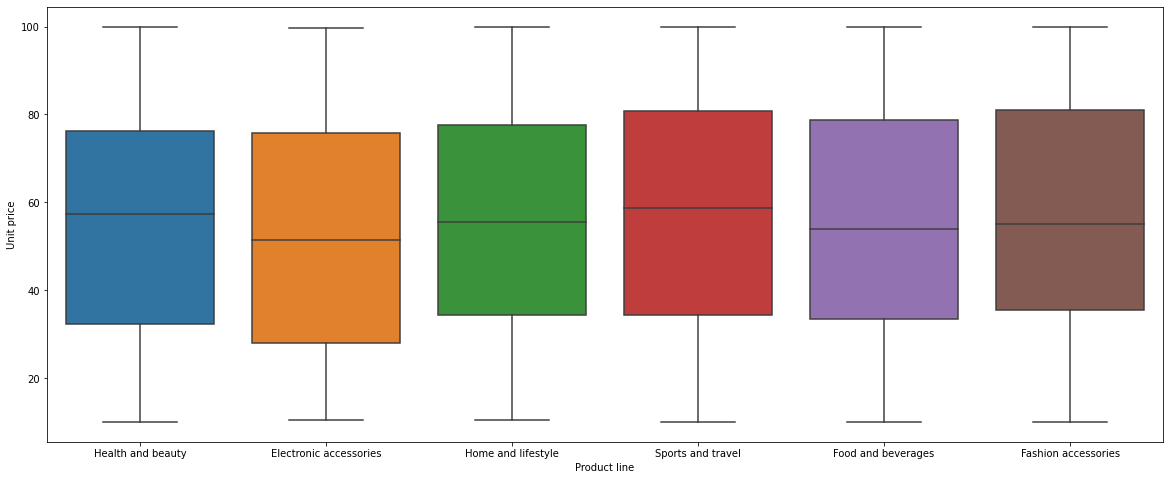

In [24]:
 plt.figure(figsize=(20,8))
 sns.boxplot(x="Product line", y ="Unit price", data=sales).set_title("")

In [27]:
sales['Unit price'].max()

99.96